## <div style="text-align: center"> Topic: Measuring Baryon Asymmetries using LHCb Collision data </div>

### What is the importance of the (Baryon Asymmetry) Matter-Antimatter Asymmetry problem?

In the very beginning of the Universe, matter and anti-matter were to be found in equal proportions of each other. When particles and its anti-particles come together, they annihilate and leave behind nothing but pure energy. But, this means that matter as we know it shouldn't have existed in the first place. Study of why our Universe does not follow the ideal path where matter and antimatter pop in and out of existense, would enable scientists understand the reason behind matter as we know it.  

This imbalance in Baryonic Matter (Matter) and Anit-Baryonic Matter (Anti-matter) in the observable Universe is known as the Baryon Asymmetry Problem.

In [46]:
from pyspark.sql import SparkSession
from __future__ import print_function
from __future__ import division

%pylab inline
pylab.rcParams['figure.figsize'] = (13.0, 8.0)

spark = SparkSession.builder \
        .appName("LHCb Open Data with Spark") \
        .config("spark.jars.packages", "org.diana-hep:spark-root_2.11:0.1.11") \
        .getOrCreate()

sql = spark.sql

Populating the interactive namespace from numpy and matplotlib


## Datasets

1. Simulation Data: http://opendata.cern.ch/eos/opendata/lhcb/AntimatterMatters2017/data/PhaseSpaceSimulation.root
2. Measurement Data (Baryon 2-Up): http://opendata.cern.ch/eos/opendata/lhcb/AntimatterMatters2017/data/B2HHH_MagnetDown.root
3. Measurement Data (Baryon 2-Down): http://opendata.cern.ch/eos/opendata/lhcb/AntimatterMatters2017/data/B2HHH_MagnetUp.root

### What are ROOT files?

Datasets are compressed into different formats to compliment analyses by reducing disk space. Even though Binary Compressions have been very effective, it has been difficult to work with due to poor machine-independence characteristics. Such issue are handled by the ROOT framework for generating .root files  

In [47]:
# The data is located in the local direcotry : /Users/sumitsaha/GHR/spark_project/

data_directory = "/Users/sumitsaha/GHR/spark_project/"

# PhaseSpaceSimulation.root contains the ideal simulated dataset
# This can be used to calculate the ideal Invariant mass of B-meson
# The dataset is being read using the "org.dianahep.sparkroot" engine

simulation_data = spark.read.format("org.dianahep.sparkroot").load(data_directory + "PhaseSpaceSimulation.root")

# We create a lazy version of the dataframe by creating a view for the data
# The view is only available when .count() is executed

simulation_data.createOrReplaceTempView("sim_data") 

# We try to cache the data i.e. make it persistent for the rest of the Spark Context

simulation_data.cache()
simulation_data.count()

50000

In [48]:
# The PhaseSpaceSimulation dataset consists of the following features

simulation_data.printSchema()

root
 |-- B_FlightDistance: double (nullable = true)
 |-- B_VertexChi2: double (nullable = true)
 |-- H1_PX: double (nullable = true)
 |-- H1_PY: double (nullable = true)
 |-- H1_PZ: double (nullable = true)
 |-- H1_ProbK: double (nullable = true)
 |-- H1_ProbPi: double (nullable = true)
 |-- H1_Charge: integer (nullable = true)
 |-- H1_IPChi2: double (nullable = true)
 |-- H1_isMuon: integer (nullable = true)
 |-- H2_PX: double (nullable = true)
 |-- H2_PY: double (nullable = true)
 |-- H2_PZ: double (nullable = true)
 |-- H2_ProbK: double (nullable = true)
 |-- H2_ProbPi: double (nullable = true)
 |-- H2_Charge: integer (nullable = true)
 |-- H2_IPChi2: double (nullable = true)
 |-- H2_isMuon: integer (nullable = true)
 |-- H3_PX: double (nullable = true)
 |-- H3_PY: double (nullable = true)
 |-- H3_PZ: double (nullable = true)
 |-- H3_ProbK: double (nullable = true)
 |-- H3_ProbPi: double (nullable = true)
 |-- H3_Charge: integer (nullable = true)
 |-- H3_IPChi2: double (nullable = 

In [49]:
# We try to view the ".root" files in a structured format

simulation_data.limit(10).toPandas()

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,...,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon
0,0.0,1.0,3551.84,1636.96,23904.14,1.0,0.0,-1,1.0,0,...,1.0,0,36100.40,16546.83,295600.61,1.0,0.0,-1,1.0,0
1,0.0,1.0,-2525.98,-5284.05,35822.00,1.0,0.0,1,1.0,0,...,1.0,0,-8648.32,-16617.56,98535.13,1.0,0.0,-1,1.0,0
2,0.0,1.0,-700.67,1299.73,8127.76,1.0,0.0,-1,1.0,0,...,1.0,0,-13483.34,10860.77,79787.59,1.0,0.0,1,1.0,0
3,0.0,1.0,3364.63,1397.30,222815.29,1.0,0.0,1,1.0,0,...,1.0,0,1925.16,-551.12,40420.96,1.0,0.0,1,1.0,0
4,0.0,1.0,-581.66,-1305.24,22249.59,1.0,0.0,-1,1.0,0,...,1.0,0,-2820.04,-8305.43,250130.00,1.0,0.0,-1,1.0,0
5,0.0,1.0,112.84,-13297.98,51882.87,1.0,0.0,1,1.0,0,...,1.0,0,-440.95,-13699.42,71163.14,1.0,0.0,-1,1.0,0
6,0.0,1.0,5558.97,3913.52,56981.08,1.0,0.0,-1,1.0,0,...,1.0,0,3457.70,780.13,28716.94,1.0,0.0,1,1.0,0
7,0.0,1.0,-15208.03,-1783.93,265210.55,1.0,0.0,1,1.0,0,...,1.0,0,-4478.67,-164.39,71498.09,1.0,0.0,1,1.0,0
8,0.0,1.0,-109.04,8239.25,191486.94,1.0,0.0,-1,1.0,0,...,1.0,0,-2083.59,11359.35,192297.67,1.0,0.0,-1,1.0,0
9,0.0,1.0,15175.26,93142.09,379269.30,1.0,0.0,1,1.0,0,...,1.0,0,3295.84,24950.02,105990.48,1.0,0.0,-1,1.0,0


Text(0,0.5,'Count')

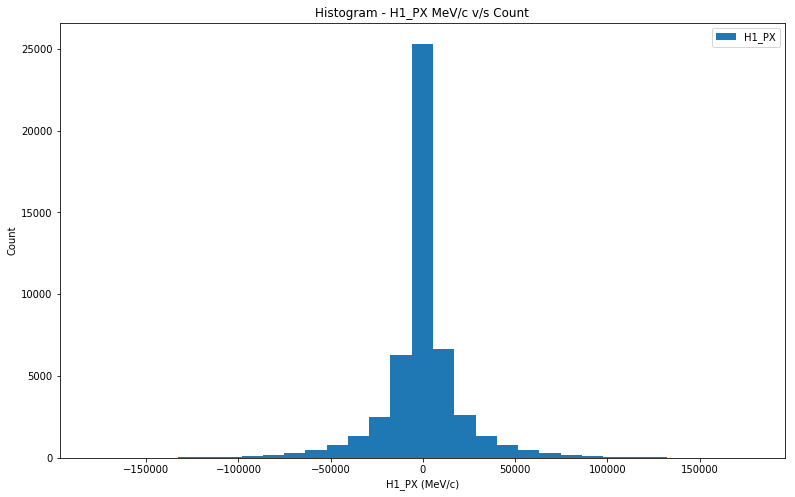

In [50]:
# We try to visualise the frequency of occurrance of Hadrons which have Zero momentum
# This will be later used to calculate the Invariant mass of B-meson

h1px_data = simulation_data.select('H1_PX').toPandas()

# The bin-size of the plot has range [-179037.39, 178396.84]

h1px_data.plot.hist(bins=31, range=[h1px_data.min().iloc[0], h1px_data.max().iloc[0]], \
                    title="Histogram - H1_PX MeV/c v/s Count")
xlabel("H1_PX (MeV/c)")
ylabel("Count")

In [51]:
h1px_data.max()

H1_PX    178396.84
dtype: float64

In [52]:
h1px_data.min()

H1_PX   -179037.39
dtype: float64

In [58]:
"""
In the following snippet, we try to aggregate the data 
into clusters of order 10**3 for better visualisations
and easier analysis
"""

H1_PX_SQL = sql("select round(H1_PX/10000,0)*10000 as bin, count(1) as count \
                 from sim_data \
                 group by round(H1_PX/10000,0) order by 1")

H1_PX_SQL.show(10)

+---------+-----+
|      bin|count|
+---------+-----+
|-180000.0|    1|
|-170000.0|    5|
|-160000.0|    1|
|-150000.0|    9|
|-140000.0|   11|
|-130000.0|   19|
|-120000.0|   26|
|-110000.0|   44|
|-100000.0|   60|
| -90000.0|  107|
+---------+-----+
only showing top 10 rows



Text(0,0.5,'Count')

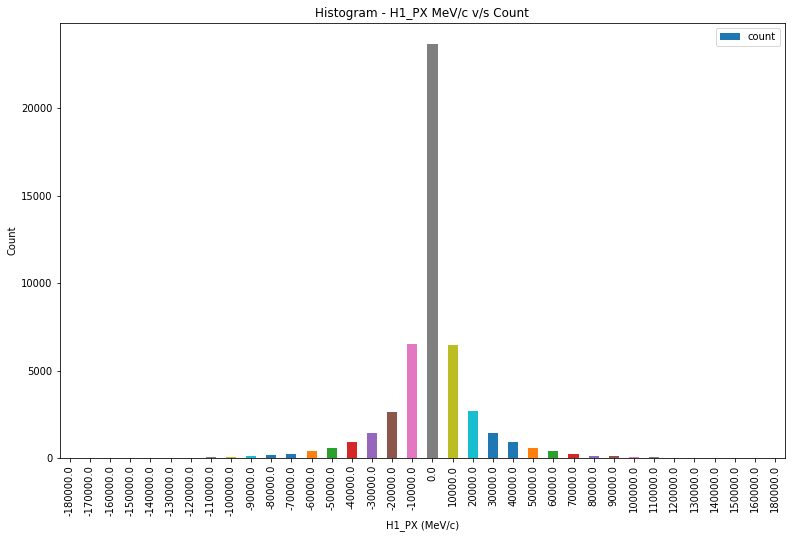

In [54]:
H1_PX_Pandas.plot.bar(x = 'bin', y = 'count', title = "Histogram - H1_PX MeV/c v/s Count")
xlabel("H1_PX (MeV/c)")
ylabel("Count")

In [56]:
# Finding the magnitude of the momentum for First Kaon candidate
# This is because momentum is a vector quantity

p_mag = sql("""select H1_PX, H1_PY, H1_PZ, round(sqrt(H1_PX*H1_PX+H1_PY*H1_PY+H1_PZ*H1_PZ),2) as H1_MAG
               from sim_data 
               where H1_ProbK = 1.0
            """)

p_mag.show(5)

+--------+--------+---------+---------+
|   H1_PX|   H1_PY|    H1_PZ|   H1_MAG|
+--------+--------+---------+---------+
| 3551.84| 1636.96| 23904.14| 24221.96|
|-2525.98|-5284.05|  35822.0| 36297.62|
| -700.67| 1299.73|  8127.76|  8260.79|
| 3364.63|  1397.3|222815.29|222845.07|
| -581.66|-1305.24| 22249.59| 22295.43|
+--------+--------+---------+---------+
only showing top 5 rows



Text(0,0.5,'Count')

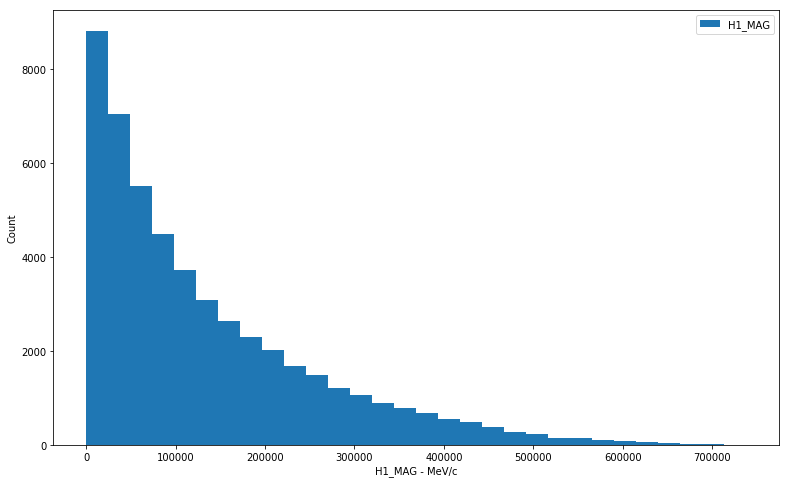

In [59]:
# Here we visualise the total momentum of Kaon 1

p_tot = p_mag.select('H1_MAG').toPandas()
p_tot.plot.hist(bins=30)
xlabel("H1_MAG - MeV/c")
ylabel("Count")

Text(0,0.5,'Count')

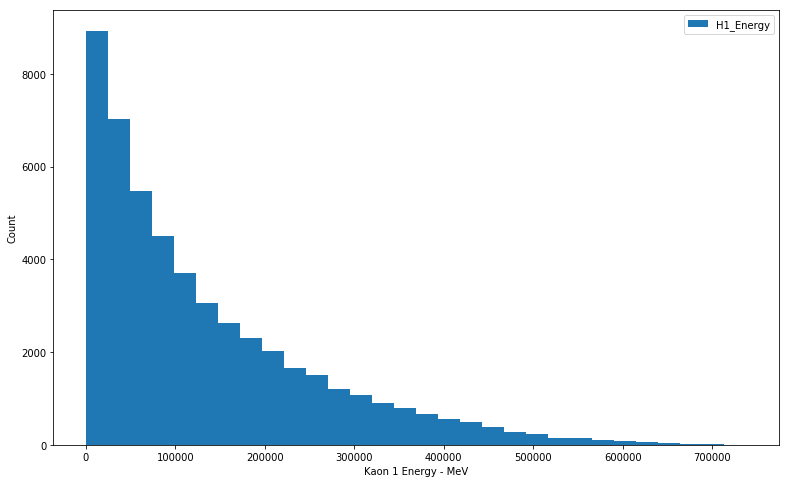

In [61]:
# Calculating the energy of Kaon 1

kcharged_mass = 493.677 # Invariant Mass of Kaon 

H1_energy = sql("""
                select round(sqrt({0} + H1_PX*H1_PX + H1_PY*H1_PY + H1_PZ*H1_PZ),2) as H1_Energy
                from sim_data
                where H1_ProbK = 1.0
                """.format(kcharged_mass*kcharged_mass))

H1_energy_Pandas = H1_energy.toPandas()
H1_energy_Pandas.head()

H1_energy_Pandas.plot.hist(bins=30)

xlabel("Kaon 1 Energy - MeV")
ylabel("Count")

Text(0,0.5,'Count')

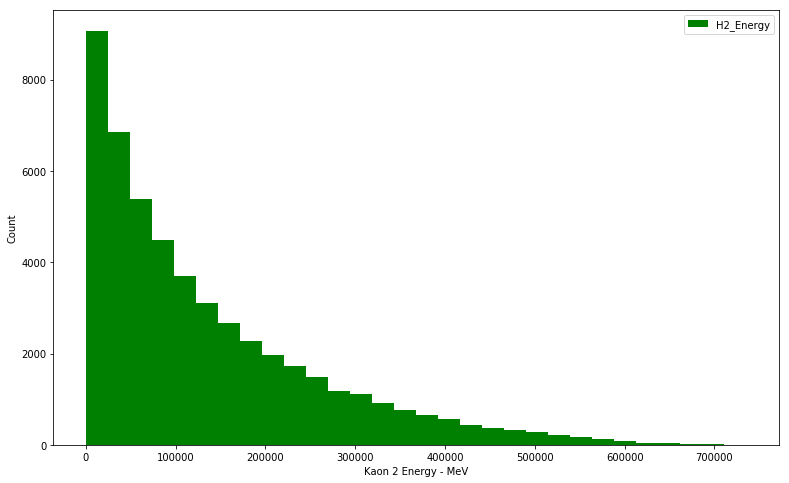

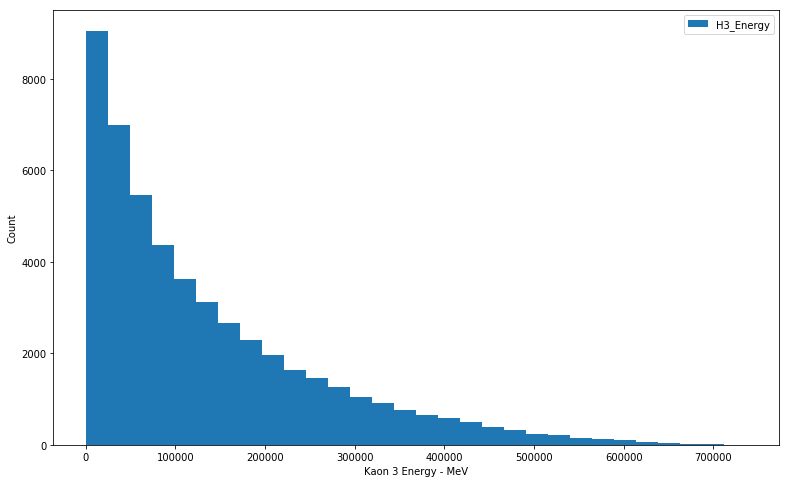

In [109]:
# Calculating the energy of Kaon 2

H2_energy = sql("""
                select round(sqrt({0} + H2_PX*H2_PX + H2_PY*H2_PY + H2_PZ*H2_PZ),2) as H2_Energy
                from sim_data
                where H2_ProbK = 1.0
                """.format(kcharged_mass*kcharged_mass))
H2_energy_Pandas = H2_energy.toPandas()
H2_energy_Pandas.head()

H2_energy_Pandas.plot.hist(bins=30,color="green")
xlabel("Kaon 2 Energy - MeV")
ylabel("Count")

# Calculating the energy of Kaon 3

H3_energy = sql("""
                select round(sqrt({0} + H3_PX*H3_PX + H3_PY*H3_PY + H3_PZ*H3_PZ),2) as H3_Energy
                from sim_data
                where H3_ProbK = 1.0
                """.format(kcharged_mass*kcharged_mass))
H3_energy_Pandas = H3_energy.toPandas()
H3_energy_Pandas.head()

H3_energy_Pandas.plot.hist(bins=30)
xlabel("Kaon 3 Energy - MeV")
ylabel("Count")

In [65]:
# Total energy of all the Kaons : K1 + K2 + K3 => Tot_Energy
# Total momentum of all the Kaons 1 => PX_Tot
# Total momentum of all the Kaons 2 => PY_Tot
# Total momentum of all the Kaons 3 => PZ_Tot

b_meson_4momentum = sum_kaons_energy = sql("""
  select 
    sqrt({0} + H1_PX*H1_PX + H1_PY*H1_PY + H1_PZ*H1_PZ)  +
    sqrt({0} + H2_PX*H2_PX + H2_PY*H2_PY + H2_PZ*H2_PZ)  +
    sqrt({0} + H3_PX*H3_PX + H3_PY*H3_PY + H3_PZ*H3_PZ)  as Tot_Energy,
    H1_PX + H2_PX + H3_PX as PX_Tot,
    H1_PY + H2_PY + H3_PY as PY_Tot,
    H1_PZ + H2_PZ + H3_PZ as PZ_Tot
  from sim_data
  where H1_ProbK = 1.0 and H2_ProbK = 1.0 and H3_ProbK = 1.0""".format(kcharged_mass*kcharged_mass))

b_meson_4momentum.show(5)

+------------------+------------------+------------------+------------------+
|        Tot_Energy|            PX_Tot|            PY_Tot|            PZ_Tot|
+------------------+------------------+------------------+------------------+
| 657116.5757740112| 81159.39000000001|34164.380000000005|         651168.39|
| 731372.0511105937|-54357.21000000001|        -118454.64| 719646.4400000001|
|106495.84886114487|          -15596.0|15711.460000000001|         104035.62|
| 425265.3012500729|           7482.21|           2216.05|425161.00000000006|
|  338761.408158081|          -2248.65|         -11608.84|         338513.81|
+------------------+------------------+------------------+------------------+
only showing top 5 rows



In [66]:
# Finding invariant mass of B-meson

b_meson_invariant_mass = b_meson_4momentum.selectExpr("""
   sqrt(Tot_Energy* Tot_Energy - (PX_Tot*PX_Tot + PY_Tot*PY_Tot + PZ_Tot*PZ_Tot) ) as invariant_mass
   """)
   
b_meson_invariant_mass.show(5)

+------------------+
|    invariant_mass|
+------------------+
| 5279.259021223659|
|5279.2541641354055|
| 5279.242799854169|
| 5273.156761236732|
| 5279.252178269909|
+------------------+
only showing top 5 rows



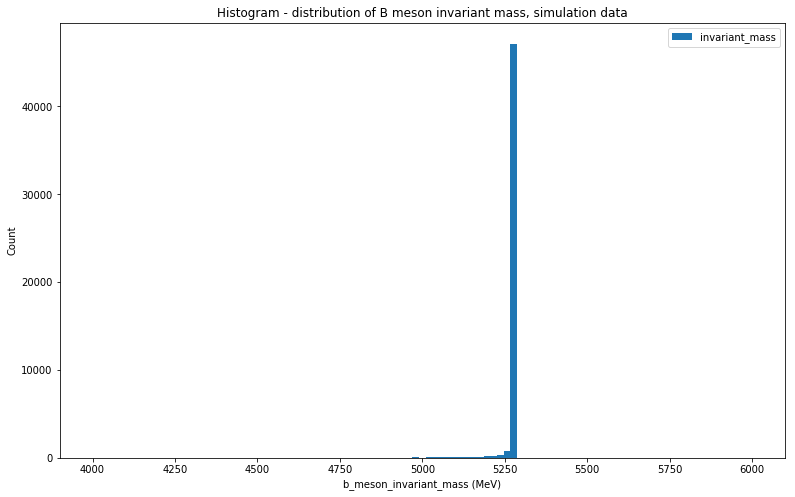

In [70]:
# Finding the frequency of invariant mass
# Plot shows that there is high probability that invarant_mass = 5279 MeV apprx.
# This corresponds to the actual B-meson invariant mass i.e. 5279.26 MeV

b_meson_invariant_mass.toPandas().plot.hist(\
                            bins=101, range=[4000, 6000],\
                            title="Histogram - distribution of B meson invariant mass, simulation data") 
xlabel('b_meson_invariant_mass (MeV)')
ylabel('Count');

## Working with Real Data

In [71]:
B2HHH_MagnetDown = spark.read.format("org.dianahep.sparkroot").load(data_directory + "B2HHH_MagnetDown.root")
B2HHH_MagnetUp = spark.read.format("org.dianahep.sparkroot").load(data_directory + "B2HHH_MagnetUp.root")

# Merging the data into a single dataframe

B2HHH_AllData = B2HHH_MagnetDown.union(B2HHH_MagnetUp)

## Preselection

* Probability ( Hadron 1 is a Pion ) < 0.5
* Probability ( Hadron 2 is a Pion ) < 0.5
* Probability ( Hadron 3 is a Pion ) < 0.5
* Probability ( Hadron 1 is a Kaon ) > 0.5
* Probability ( Hadron 2 is a Kaon ) > 0.5
* Probability ( Hadron 3 is a Kaon ) > 0.5
* Probability ( Hadron 1 is a Muon ) = 0.0
* Probability ( Hadron 2 is a Muon ) = 0.0
* Probability(  Hadron 3 is a Muon ) = 0.0

In [72]:
preselection = """H1_ProbPi < 0.5 and H2_ProbPi < 0.5 and H3_ProbPi < 0.5 
      and H1_ProbK > 0.5 and H2_ProbK > 0.5 and H3_ProbK > 0.5 
      and H1_isMuon = 0 and H2_isMuon = 0 and H3_isMuon = 0"""

# Apply cuts to the data as a filter 

B2HHH_AllData_WithCuts = B2HHH_AllData.filter(preselection)

In [73]:
# Caching the dataframe to improve performance

B2HHH_AllData_WithCuts.cache()

# Data only read when the following command is executed

B2HHH_AllData_WithCuts.count()

23895

In [75]:
# Creating or Replacing the View

B2HHH_AllData_WithCuts.createOrReplaceTempView("B2HHH_AllData_WithCuts")

In [76]:
# Viewing the data as a Pandas dataframe

B2HHH_AllData_WithCuts.limit(10).toPandas()

,B_FlightDistance,B_VertexChi2,H1_PX,H1_PY,H1_PZ,H1_ProbK,H1_ProbPi,H1_Charge,H1_IPChi2,H1_isMuon,...,H2_IPChi2,H2_isMuon,H3_PX,H3_PY,H3_PZ,H3_ProbK,H3_ProbPi,H3_Charge,H3_IPChi2,H3_isMuon
0,6.888037,8.426947,1207.753798,-84.290958,10399.473702,0.902219,0.041574,-1,998.424410,0,...,110.519068,0,1973.085892,-289.150032,26771.341608,0.915843,0.057261,1,386.493713,0
1,8.957103,3.474719,-811.617861,-518.300956,22338.883014,0.942885,0.093401,1,162.677006,0,...,1994.119734,0,-4801.397918,1993.340031,76466.229808,0.806471,0.385119,-1,158.823018,0
2,9.100733,4.113123,-2007.925735,-2555.080382,26601.465958,0.917661,0.077237,-1,1355.611615,0,...,8500.518262,0,-1260.859080,-2824.663002,22365.178510,0.947676,0.097263,1,352.235461,0
3,11.077374,2.360357,1408.170513,-1372.864558,66357.093308,0.785618,0.119467,-1,2.799029,0,...,564.019813,0,2171.855775,-1964.419835,92096.742555,0.560237,0.070540,1,44.498271,0
4,17.743006,5.116309,1457.671574,1311.684099,8551.692070,0.783945,0.029395,1,18266.642863,0,...,1098.894225,0,10985.230400,1271.856077,62682.682662,0.576559,0.455894,-1,360.444011,0
5,11.554098,1.120899,-77.919930,598.047768,18486.604881,0.937157,0.227115,1,89.128636,0,...,2387.913090,0,-3786.001956,-3050.190096,49924.677288,0.940656,0.096659,-1,827.264326,0
6,8.296893,7.380471,970.351808,-490.045926,27929.242265,0.966135,0.095613,1,135.543971,0,...,944.174083,0,1618.033440,-1593.587768,45253.841121,0.959964,0.098093,-1,260.910241,0
7,15.875883,1.656760,2336.165388,4166.002188,35728.525679,0.946878,0.060513,-1,3321.946818,0,...,1942.129052,0,-1708.189185,2517.048779,27592.747481,0.961387,0.125535,1,7027.069112,0
8,12.265774,5.394378,2606.155962,-4657.669797,99824.722050,0.755108,0.403123,1,153.705895,0,...,4.976051,0,961.067631,892.008741,12739.165721,0.630626,0.030043,-1,4351.779561,0
9,7.960260,9.528332,-1740.175238,1060.634895,76542.224969,0.823950,0.096627,-1,28.678577,0,...,309.280125,0,-2026.920178,887.978374,47609.309664,0.972340,0.161073,1,193.376446,0


In [77]:
# The dataframe containing real data has the following features

B2HHH_AllData_WithCuts.printSchema()

root
 |-- B_FlightDistance: double (nullable = true)
 |-- B_VertexChi2: double (nullable = true)
 |-- H1_PX: double (nullable = true)
 |-- H1_PY: double (nullable = true)
 |-- H1_PZ: double (nullable = true)
 |-- H1_ProbK: double (nullable = true)
 |-- H1_ProbPi: double (nullable = true)
 |-- H1_Charge: integer (nullable = true)
 |-- H1_IPChi2: double (nullable = true)
 |-- H1_isMuon: integer (nullable = true)
 |-- H2_PX: double (nullable = true)
 |-- H2_PY: double (nullable = true)
 |-- H2_PZ: double (nullable = true)
 |-- H2_ProbK: double (nullable = true)
 |-- H2_ProbPi: double (nullable = true)
 |-- H2_Charge: integer (nullable = true)
 |-- H2_IPChi2: double (nullable = true)
 |-- H2_isMuon: integer (nullable = true)
 |-- H3_PX: double (nullable = true)
 |-- H3_PY: double (nullable = true)
 |-- H3_PZ: double (nullable = true)
 |-- H3_ProbK: double (nullable = true)
 |-- H3_ProbPi: double (nullable = true)
 |-- H3_Charge: integer (nullable = true)
 |-- H3_IPChi2: double (nullable = 

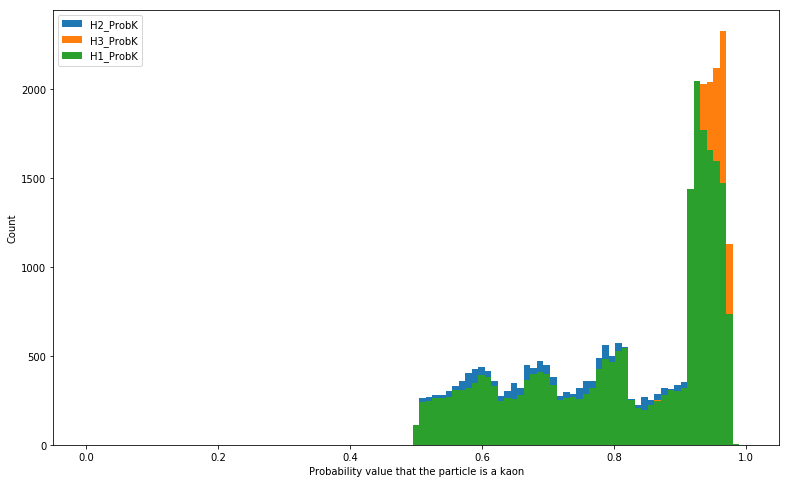

In [88]:
# Visualizing frequency of probabilities of Hadrons being Kaons

B2HHH_AllData_WithCuts.select("H2_ProbK", "H3_ProbK", "H1_ProbK").toPandas().plot.hist(bins=101, range=[0.0, 1.0])
xlabel('Probability value that the particle is a kaon')
ylabel('Count');

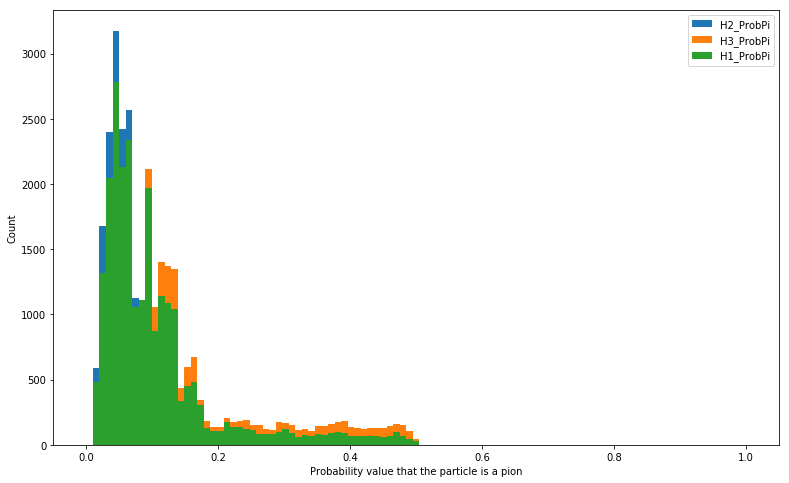

In [89]:
# Visualizing frequency of probabilities of Hadrons being KPions

B2HHH_AllData_WithCuts.select("H2_ProbPi", "H3_ProbPi", "H1_ProbPi").toPandas().plot.hist(bins=101, range=[0.0, 1.0])
xlabel('Probability value that the particle is a pion')
ylabel('Count');

In [90]:
# Total energy of all the Kaons : K1 + K2 + K3 => Tot_Energy
# Total momentum of all the Kaons 1 => PX_Tot
# Total momentum of all the Kaons 2 => PY_Tot
# Total momentum of all the Kaons 3 => PZ_Tot

b_meson_4momentum_withcuts = sql("""
  select 
     sqrt({0} + H1_PX*H1_PX + H1_PY*H1_PY + H1_PZ*H1_PZ)  +
     sqrt({0} + H2_PX*H2_PX + H2_PY*H2_PY + H2_PZ*H2_PZ) +
     sqrt({0} + H3_PX*H3_PX + H3_PY*H3_PY + H3_PZ*H3_PZ) as Tot_Energy,
     H1_PX + H2_PX + H3_PX as PX_Tot,
     H1_PY + H2_PY + H3_PY as PY_Tot,
     H1_PZ + H2_PZ + H3_PZ as PZ_Tot
  from B2HHH_AllData_WithCuts""".format(kcharged_mass*kcharged_mass))

b_meson_4momentum_withcuts.createOrReplaceTempView("b_meson_4momentum_mycuts_read_data")
b_meson_4momentum_withcuts.show(5)


+------------------+-------------------+-------------------+------------------+
|        Tot_Energy|             PX_Tot|             PY_Tot|            PZ_Tot|
+------------------+-------------------+-------------------+------------------+
| 86162.89710374283|  1916.065670301517|  77.15992169481359| 85981.36256238335|
|116710.00497921911| -7144.666830516883| -15.24835325482104|116369.28397058396|
| 64528.29362291747|-1575.5401941634025|-7543.4895996123105| 63848.13679774214|
| 207873.7078340979|  1924.019093047381| -3781.162863847703|207762.59892769693|
|117052.18424146794| 18764.329326458574|   2844.36565135338|115392.75963356277|
+------------------+-------------------+-------------------+------------------+
only showing top 5 rows



In [91]:
# Inferred Invarant mass of B-meson from captured data

b_meson_invariant_mass_withcuts = b_meson_4momentum_withcuts.selectExpr("""
   sqrt(Tot_Energy* Tot_Energy - (PX_Tot*PX_Tot + PY_Tot*PY_Tot + PZ_Tot*PZ_Tot) ) as invariant_mass""")
   
b_meson_invariant_mass_withcuts.show(5)

+------------------+
|    invariant_mass|
+------------------+
| 5250.987328087266|
|5326.2100776796615|
| 5284.840877393883|
| 5308.658345711811|
| 5053.156322435298|
+------------------+
only showing top 5 rows



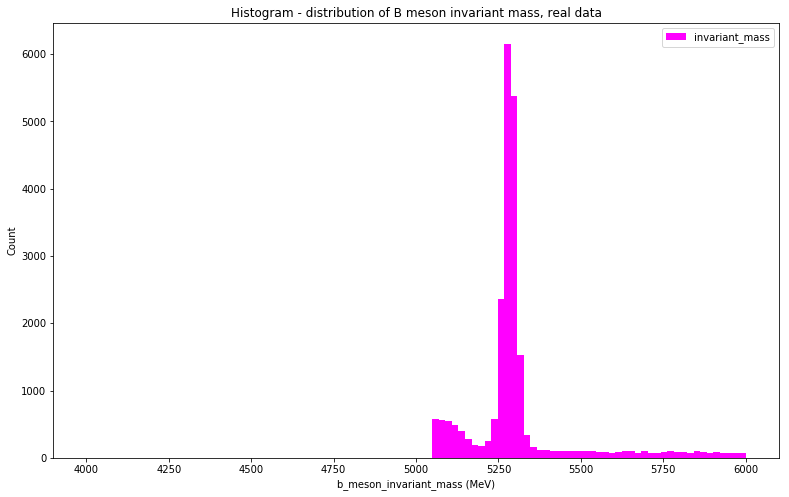

In [108]:
b_meson_invariant_mass_withcuts.toPandas().plot.hist(bins=101, range=[4000, 6000],
title="Histogram - distribution of B meson invariant mass, real data", color="magenta") 
xlabel('b_meson_invariant_mass (MeV)')
ylabel('Count');

## In search of Global Baryonic Asymmetries (CP Violation)

* B<sup>+</sup> has a charge of +1
* B<sup>-</sup> has a charge of -1
* B<sup>+</sup> &rarr; K<sup>+</sup>K<sup>+</sup>K<sup>-</sup>
* B<sup>-</sup> &rarr; K<sup>+</sup>K<sup>-</sup>K<sup>-</sup>

In [25]:
B_charge = B2HHH_AllData_WithCuts.selectExpr("H1_charge + H2_charge + H3_charge as B_Charge")

In [93]:
# Clearly there is asymmetry in the freqeuency of occurrances of B+ and B-
# But in theory both should have near to equal values

B_charge.groupBy("B_Charge").count().show()

+--------+-----+
|B_Charge|count|
+--------+-----+
|      -1|11505|
|       1|12390|
+--------+-----+



## Calculating Asymmetry



In [98]:
N_plus = 12390.0 # Number of B+
N_minus = 11505.0 # Number of B-

A =  (N_minus - N_plus) / (N_minus + N_plus)
print("Asymmetry = ", A)

Asymmetry =  -0.037037037037037035


## Calculating Statistical Uncertainty of the Asymmetry

In [99]:
print("Statistical Deviation (Sigma) = ", sqrt((1 - A*A)/(N_minus + N_plus)))

Statistical Deviation (Sigma) =  0.006464700479261738


## Two body Resonance and Dalitz Plot

* B<sup>+</sup> &rarr; K<sup>+</sup><sub>1</sub>K<sup>+</sup><sub>2</sub>K<sup>-</sup><sub>3</sub>
* R<sup>++</sup><sub>1</sub> &rarr; K<sup>+</sup><sub>1</sub>K<sup>+</sup><sub>2</sub>
* R<sup>0</sup><sub>1</sub> &rarr; K<sup>+</sup><sub>1</sub>K<sup>-</sup><sub>3</sub>
* R<sup>0</sup><sub>3</sub> &rarr; K<sup>+</sup><sub>2</sub>K<sup>-</sup><sub>3</sub>.

In [100]:
# Calculating the Invariant Mass of every possible Hadron Pair

two_body_resonances_df = sql("""
  select 
     sqrt({0} + H1_PX*H1_PX + H1_PY*H1_PY + H1_PZ*H1_PZ) +
     sqrt({0} + H2_PX*H2_PX + H2_PY*H2_PY + H2_PZ*H2_PZ) as Energy_K1_K2,
     sqrt((H1_PX + H2_PX)*(H1_PX + H2_PX) + (H1_PY + H2_PY)*(H1_PY + H2_PY) 
           + (H1_PZ + H2_PZ)*(H1_PZ + H2_PZ)) as P_K1_K2,
     sqrt({0} + H1_PX*H1_PX + H1_PY*H1_PY + H1_PZ*H1_PZ) +
     sqrt({0} + H3_PX*H3_PX + H3_PY*H3_PY + H3_PZ*H3_PZ) as Energy_K1_K3,
     sqrt((H1_PX + H3_PX)*(H1_PX + H3_PX) + (H1_PY + H3_PY)*(H1_PY + H3_PY) 
           + (H1_PZ + H3_PZ)*(H1_PZ + H3_PZ)) as P_K1_K3,
     sqrt({0} + H2_PX*H2_PX + H2_PY*H2_PY + H2_PZ*H2_PZ) +
     sqrt({0} + H3_PX*H3_PX + H3_PY*H3_PY + H3_PZ*H3_PZ) as Energy_K2_K3,
     sqrt((H2_PX + H3_PX)*(H2_PX + H3_PX) + (H2_PY + H3_PY)*(H2_PY + H3_PY) 
           + (H2_PZ + H3_PZ)*(H2_PZ + H3_PZ)) as P_K2_K3,
     H1_Charge, H2_Charge, H3_Charge
  from B2HHH_AllData_WithCuts""".format(kcharged_mass*kcharged_mass))

two_body_resonances_df.limit(5).toPandas()

,Energy_K1_K2,P_K1_K2,Energy_K1_K3,P_K1_K3,Energy_K2_K3,P_K2_K3,H1_Charge,H2_Charge,H3_Charge
0,59312.848237,59211.181509,37331.391551,37308.534012,75681.554420,75585.380172,-1,1,1
1,40065.665041,40022.232171,99009.419207,98975.411119,94344.925710,94244.771077,1,-1,-1
2,41944.817064,41751.672744,49387.243264,49369.614780,37724.526918,37581.719924,-1,1,1
3,115729.095355,115680.388609,158532.678053,158529.404702,141485.642261,141426.952947,-1,1,1
4,53399.569782,53304.215413,72440.132643,72359.081204,108264.666058,108244.552904,1,-1,-1


In [101]:
# 2-body resonance invariant mass from two_body_resonances_df

two_body_resonances_invariant_mass_GeV_df = two_body_resonances_df.selectExpr( 
              "sqrt(Energy_K1_K2*Energy_K1_K2 - P_K1_K2*P_K1_K2) / 1000.0 as Mass_K1_K2", 
              "sqrt(Energy_K1_K3*Energy_K1_K3 - P_K1_K3*P_K1_K3) / 1000.0 as Mass_K1_K3",
              "sqrt(Energy_K2_K3*Energy_K2_K3 - P_K2_K3*P_K2_K3) / 1000.0 as Mass_K2_K3",
              "H1_Charge", "H2_Charge", "H3_Charge") 

two_body_resonances_invariant_mass_GeV_df.show(5)

+------------------+------------------+------------------+---------+---------+---------+
|        Mass_K1_K2|        Mass_K1_K3|        Mass_K2_K3|H1_Charge|H2_Charge|H3_Charge|
+------------------+------------------+------------------+---------+---------+---------+
| 3.471303828587013| 1.306171891413032| 3.814181901855551|       -1|        1|        1|
|1.8650595784143182| 2.594818979058174| 4.346047856093062|        1|       -1|       -1|
| 4.020634479824776| 1.319444470787454|3.2793686448023838|       -1|        1|        1|
|3.3572612179719226| 1.018751964103818| 4.074793973001933|       -1|        1|        1|
|3.1897761838303795|3.4258115164737077|2.0867877492976117|        1|       -1|       -1|
+------------------+------------------+------------------+---------+---------+---------+
only showing top 5 rows



In [102]:
# Two_body_resonances_invariant_mass_GeV_df.filter("H1_Charge * H2_Charge = -1").show()

two_body_resonances_invariant_mass_GeV_df.createOrReplaceTempView("t1")
sql("select H2_Charge * H3_Charge, count(*) from t1 group by H2_Charge * H3_Charge").show()

+-----------------------+--------+
|(H2_Charge * H3_Charge)|count(1)|
+-----------------------+--------+
|                      1|   23895|
+-----------------------+--------+



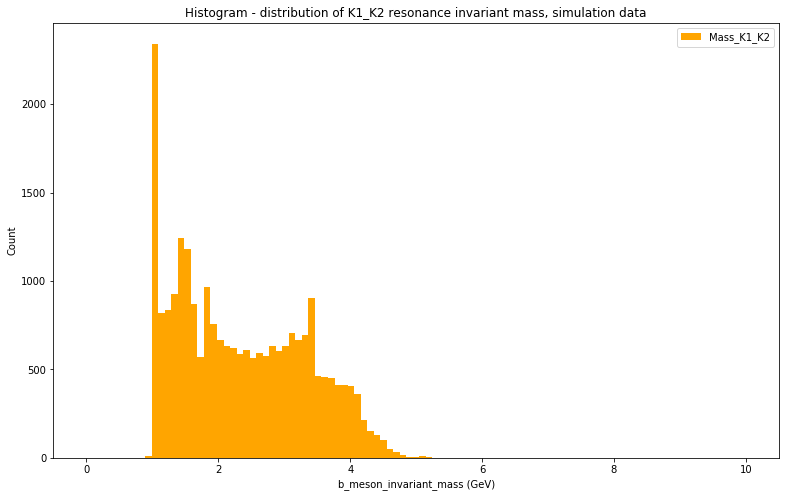

In [107]:
# plot the invariant mass for one of these combinations

two_body_resonances_invariant_mass_GeV_df.filter("H1_Charge + H2_Charge = 0").select("Mass_K1_K2") \
   .toPandas().plot.hist(bins=101, range=[0, 10],
title="Histogram - distribution of K1_K2 resonance invariant mass, simulation data", color="orange") 
xlabel('b_meson_invariant_mass (GeV)')
ylabel('Count');

In [104]:
two_body_resonances_invariant_mass_GeV_df.filter("H1_Charge * H3_Charge = -1").count()

23895

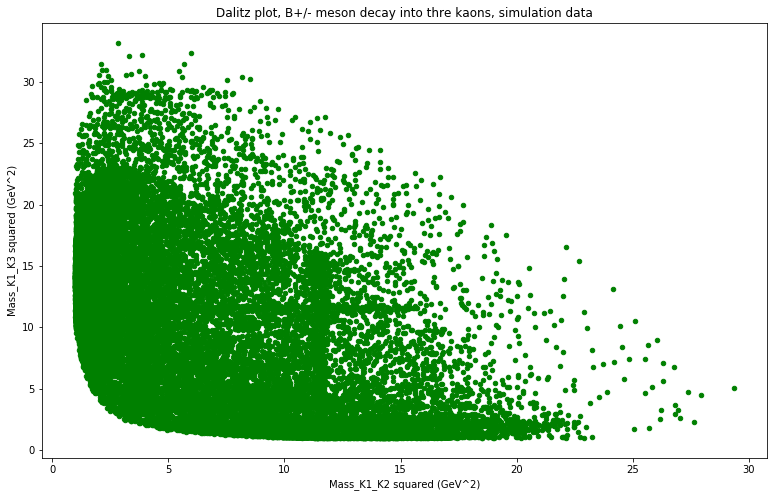

In [106]:
# Make a Dalitz plot with labelled axes for the simulation data

# This is achieved by plotting a scatter graph from Mass_12 squared vs. Mass_13 squared
# As in the text of the exercise, add a filter on data that the possible resonance has charge 0

dalitz_plot_df = two_body_resonances_invariant_mass_GeV_df \
                .filter("H1_Charge + H2_Charge = 0").filter("H1_Charge + H3_Charge = 0") \
                .selectExpr("Mass_K1_K2*Mass_K1_K2 as M12_squared", "Mass_K1_K3*Mass_K1_K3 as M13_squared")

dalitz_plot_df.toPandas().plot.scatter(x='M12_squared', y='M13_squared',
title="Dalitz plot, B+/- meson decay into thre kaons, simulation data", color="green")
xlabel('Mass_K1_K2 squared (GeV^2)')
ylabel('Mass_K1_K3 squared (GeV^2)');